__Автор__: Карпаев Алексей, ассистент кафедры информатики и вычислительной математики

# Численное интегрирование: программная реализация, ОО подход

## Постановка задачи 

Приближенно вычислить первообразную функции $f$ согласно формуле:

$$
F(x) = \int_{a}^{x} f(t) dt
$$


## Метод численного интегрирования
Для приближенного вычисления интеграла будем пользоваться квадратурными формулами. На отрезке $[a, x]$ введем равномерную сетку с шагом $h = \frac{x-a}{N}$, где $N$ --- число отрезков разбиения. Используя значения функции $f(t)$ в узлах сетки вычислим приближенное значение определенного интеграла на отрезке $[a, x]$ с помощью __формулы трапеций__.

Простая неоптимизированная реализация вычислений по данной формуле с использованием процедурного подхода:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import sympy as smp
smp.init_printing(use_latex=True)


plt.rc('font', size=20)
figureSizeConst = (13, 6.7)

In [2]:
def IntegrateTrapezium(xLeft, x, f, numBlocks):
    
    gridPoints = np.linspace(xLeft, x, numBlocks + 1)
    h = (float(x) - xLeft)/numBlocks
    
    value = 0.
    for i in range(len(gridPoints) - 1):
        tCurrent = gridPoints[i]
        tNext = gridPoints[i + 1]
        
        value += 0.5*(f(tCurrent) + f(tNext))*h
    
    return value

Использование:

In [3]:
x0 = 2.
xSym = smp.Symbol('x')

# наша старая функция
fSym = xSym**2 * smp.sin(2 * smp.pi * xSym) # определяем символьную функцию U

value = IntegrateTrapezium(xLeft=0., x=x0, \
                           f=smp.lambdify(xSym, fSym), numBlocks=100)

print(value)

-0.635781793755


Теперь рассмотрим реализацию класса для представления первообразной. Функция $F(x)$ является функцией одной переменной $x$ с параметрами $a$ и $f$:

$$
F(x) = F(x; a, f) = \int_{a}^{x} f(t)dt
$$

Как и в предыдущих лекциях, хранить значения параметров будем в полях класса, а вычислять значение функции в точке $x$ будем с помощью отдельного метода. Итак, класс __AntiderivativeTrapezium__:

__Поля класса__:
* интегрируемая функция $f$ (параметр)
* левая граница интегрирования $a$ (параметр)
* число отрезков разбиения $N (numBlocks)$(дополнительный параметр)
* ... (по Вашему усмотрению)

__Методы класса__:
* "сеттеры" для интегрируемой функции, левой границы интегрирования, числа отрезков разбиения
* вычислить значение первообразной в точке $x$ (используя метод __--call--__)
* ... (по Вашему усмотрению)

In [4]:
class AntiderivativeTrapezium:
    
    def __init__(self, name, f, xLeft, numBlocks):
        self.f = f
        self.xLeft = xLeft # xLeft = a
        self.numBlocks = numBlocks
        self.name = name
        
        print('Пустой объект класса ' + self.__class__.__name__ + ' создан.')
        
        
          
    def __call__(self, x):
        x = float(x)
        gridPoints = np.linspace(self.xLeft, x, self.numBlocks + 1)
        gridLength = len(gridPoints)
        h = (x - self.xLeft)/self.numBlocks
        
        value = 0.
        for i in range(gridLength - 1):
            tCurrent = gridPoints[i]
            tNext = gridPoints[i + 1]
            
            value += 0.5*(self.f(tCurrent) + self.f(tNext))*h
    
        return value

In [5]:
# использование: вычисление значений

F = AntiderivativeTrapezium(name='Первообразная ' + fSym.__str__(), \
                            f=smp.lambdify(xSym, fSym), \
                                  xLeft=0., numBlocks=100)

Пустой объект класса AntiderivativeTrapezium создан.


In [6]:
# использование

# пользуемся как функцией (аналогично объектам
# для представления численной производной)
F(x0)
# выводим значения всех функций на экран
print ('%s, значение в точке %.2f: %.2f ' % (F.name, x0, F(x0)))

Первообразная x**2*sin(2*pi*x), значение в точке 2.00: -0.64 


### Вычисление погрешности численного интегрирования

Для этого воспользуемся средствами символьного интегрирования из библиотеки SymPy:

In [8]:
# функция, переменная, пределы интегрирования, соответственно
valueAnalyticalSym = smp.integrate(fSym, (xSym, F.xLeft, x0))
display('Аналитическое символьное значение: %.6e' % valueAnalyticalSym)

valueAnalytical = float(valueAnalyticalSym)
print('Аналитическое значение: %.2e' % valueAnalytical)

valueNum = F(x0) # вызов ранее созданного объекта для представления первообр.
print('Численное значение: %.2e' % valueNum)

error = np.fabs(valueNum - valueAnalytical)
print('Ошибка: %.2e' % error)

'Аналитическое символьное значение: -6.366198e-01'

Аналитическое значение: -6.37e-01
Численное значение: -6.36e-01
Ошибка: 8.38e-04


### Построение графиков первообразных различных функций

In [9]:
# определения функций
functionsSym = [smp.sin(xSym**2.), \
                smp.cos(smp.sin(xSym)), \
                smp.exp(smp.cos(smp.sin(xSym))), \
                smp.log(xSym + 3.), \
                (xSym + 3.)**(1./2) ]

# определения соответствующих первообразных
antiderivativesNum = [AntiderivativeTrapezium(name='Первообразная ' + fSym.__str__(), \
                            f=smp.lambdify(xSym, fSym), \
                                  xLeft=0., numBlocks=100) \
                   
                   for fSym in functionsSym]

Пустой объект класса AntiderivativeTrapezium создан.
Пустой объект класса AntiderivativeTrapezium создан.
Пустой объект класса AntiderivativeTrapezium создан.
Пустой объект класса AntiderivativeTrapezium создан.
Пустой объект класса AntiderivativeTrapezium создан.


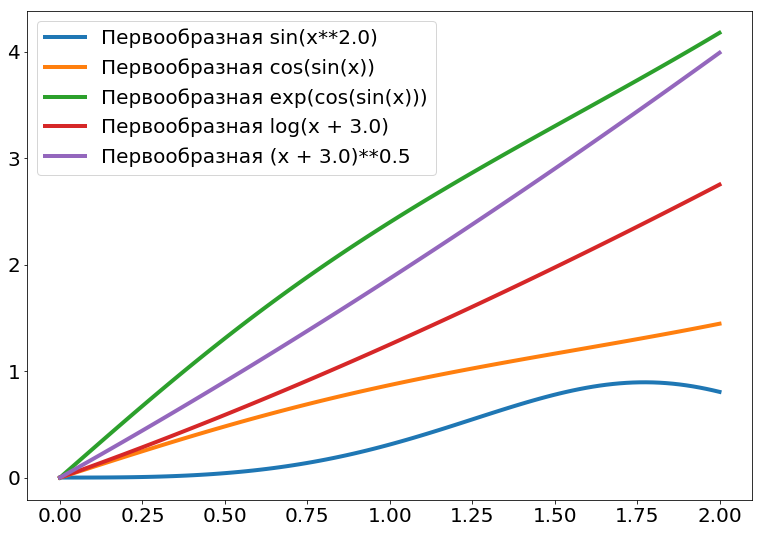

In [10]:
# собственно построение графиков первообразных
xData = np.linspace(F.xLeft, x0, 100)

plt.figure(figsize=(13, 9))
for F in antiderivativesNum:
    
    # yData = F(xData) #векторизованная операция не сработает
    yData = [F(x) for x in xData] 

    plt.plot(xData, yData, '-', linewidth=4, label=F.name)
    plt.legend(loc='best')

plt.show()

## Вопросы?